# Marketing Data Analysis (Banking)

# **1. Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import seaborn as sns
import statsmodels.api as sm
import os
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
sns.set()
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import warnings
warnings.filterwarnings('ignore')

# **2. Read data**

In [2]:
## This will show current working diractory
os.getcwd()

'/kaggle/working'

In [3]:
# Read the data from cvs into a Pandas DataFrame
data= pd.read_csv('../input/bank-marketing-dataset-analysis-classification/bank-full.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### **About this data** 

This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository. The dataset gives you information about a marketing campaign of a financial institution. 

Input variables:
- Age (Age of customer)
- Job (Job of customer)
- Martial (Martial status of customer)
- Education (Customer education level)
- Defaul (Has credit in default?)
- Housing (If costumer has housing loan)
- Loan	  (Has Personal Loan)
- Balance (Customer's individual balance)
- Contact (Communication type)
- Month	   (Last contact month of year)
- Day	   (Last contact day of the week)
- Duration	(Last contact duration, in seconds,this attribute highly affects the output target (e.g., if duration=0 theny='no')
- Campaign	(Number of contacts performed during this campaign and for this client)
- Pdays	    (Number of days that passed by after the client was last contacted from a previous campaign)
- Previous	(Number of contacts performed before this campaign and for this client)
- Poutcome	(outcome of the previous marketing campaign)
- Deposit	Y has the client subscribed a term deposit (binary: 'yes','no')

### Objective: 
Analyze data in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

# **3. Data review and checks**

In [4]:
data0 = data.copy()
print(data0.shape)

(45211, 17)


- This dataset has rows=45211 and columns=17

In [5]:
# Check data types in this dateset
numeric_col= list(data0.select_dtypes(np.number))
print(numeric_col)
print(len(numeric_col))
categorical_col= list(data0.select_dtypes(include= 'object'))
print((categorical_col))
print(len(categorical_col))

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
7
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
10


In [6]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
# Handling duplicate values
data0.duplicated().sum()

0

- Thare is no duplicate values in this dataset

## **3.1 Descriptive Statistics**

Descriptive statistics are used to describe or summarize the characteristics of a sample or data set, such as a variable's mean, standard deviation, or median. 

In [8]:
data0.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### Below conclusion can be done based on data summary:

- Maximum age is 95 and minimum age is 18. 

- Minimum account balance of customer is in negative and maximum balance is 102127.

- Maximum number of contacts performed during this campaign for perticular customer is 63 and minimum contact is 1.

- Maximum number of days that passed by after the client was last contacted from a previous campaign is 871.

- Number of contacts performed before this campaign for customer maximum is 275 and minimum is 0.


## 3.2 Null Check

In [9]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

- There is no missing value present in data.

- If missing values are present, we can handle missing values by dropping the missing records or by imputing the values.

#### If missing values present in the data
- First Outlier Treatment and then Missing Data Imputation because the outliers will also influence the missing data algorithms in a negative manner.

## 3.3 Handling Outliers

There are two type of outliers

Univariate Outliers: Univariate outliers are the data points whose values lie beyond the range of expected values based on one variable.

Multivariate Outliers: While ploting data, some values of one variable may not the beyond the expected range, but when you plot the datawith some other variable, these values may be lie far from the expected value.

### Outliers for age

In [10]:
## check the skewness of the data
data1= data0.copy()
data1.skew().sort_values()

day          0.093079
age          0.684818
pdays        2.615715
duration     3.144318
campaign     4.898650
balance      8.360308
previous    41.846454
dtype: float64

<AxesSubplot:xlabel='age', ylabel='Density'>

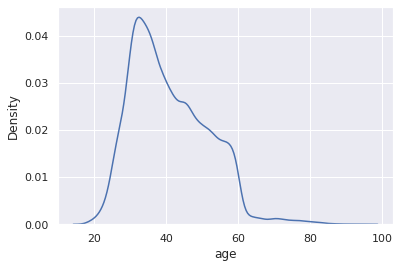

In [11]:
sns.kdeplot(data1['age'])

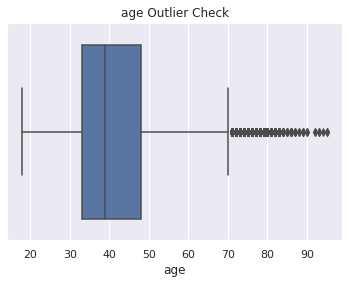

In [12]:
sns.boxplot(x=data1['age'])
plt.title('age Outlier Check')
plt.show()

In [13]:
Qntl1 = data1['age'].quantile(0.25)  ## 25% of the customers have age less than Qntl1
Qntl3 = data1['age'].quantile(0.75)  ## 75% of the customers have age less than Qntl3
IQR = Qntl3 - Qntl1
lw= Qntl1 - 1.5* IQR
up = Qntl3 + 1.5* IQR

In [14]:
print("Outlier percentage in Age:",((data1[data1['age']>up].shape[0]+ data1[data1['age']<lw].shape[0])/data1.shape[0])*100)

Outlier percentage in Age: 1.0771714848156422


- In this dataset age outliers percentage is 1.07%. So we can replace this data by upper bound limit.

In [15]:
## customers age more than upper bound are replaced with upper bound age
data1['age'] = np.where(data1['age']> up, up, data1['age'])
## customers age less than lower bound are replaced with lower bound age
data1['age'] = np.where(data1['age']< lw, lw, data1['age'])

10.5 70.5


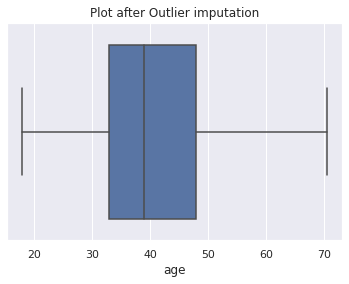

In [16]:
# After outliers imputation 
print(lw, up)
sns.boxplot(x=data1['age'])
plt.title('Plot after Outlier imputation')
plt.show()

- By the analyzing of age column, we found that minimum age of customers is 18 and maximum age is 95.

- We replace maximum  age by upper bound of age (70.5), age between 18 to 70.5 is valid range to target customer for loan.

### Outliers for balance¶

<AxesSubplot:xlabel='balance', ylabel='Density'>

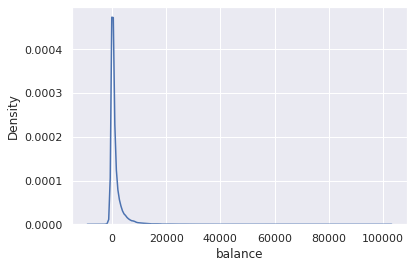

In [17]:
sns.kdeplot(data1['balance'])

In [18]:
print("Maximum balance:" ,data1['balance'].max())
print("Minimum balance:d" ,data1['balance'].min())
print("Negative balance: ", len(data1[data1['balance']<0])/len(data1))

Maximum balance: 102127
Minimum balance:d -8019
Negative balance:  0.08329831235761209


- By the analyzing of balance column, we find that minimum account balance of customers is -8019 and maximum balance is 102127. And this is valid range so, balance column does not have outliers.

- Almost 8.3% customers have negative balance is an indicator that some customers have a loan account.

### Outliers for campaign

<AxesSubplot:xlabel='campaign', ylabel='Density'>

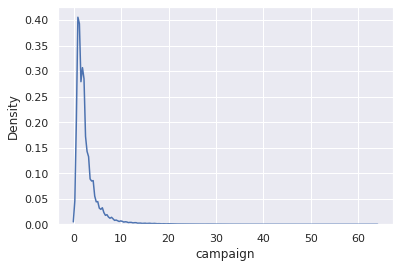

In [19]:
sns.kdeplot(data1['campaign'])

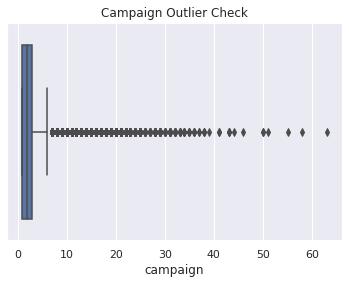

In [20]:
sns.boxplot(x=data1['campaign'])
plt.title('Campaign Outlier Check')
plt.show()

In [21]:
Qntl1 = data1['campaign'].quantile(0.25)  
Qntl3 = data1['campaign'].quantile(0.75)  
IQR = Qntl3 - Qntl1
lw = Qntl3 - 1.5* IQR
up = Qntl3 + 1.5* IQR
## customers campaign more than upper bound are replaced with upper bound campaign
data1['campaign'] = np.where(data1['campaign']> up, up, data1['campaign'])


0.0 6.0


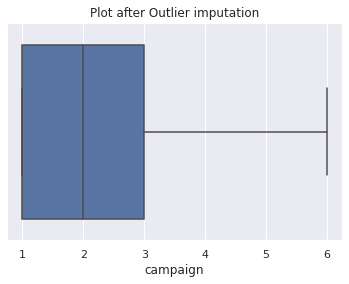

In [22]:
# After outliers imputation 
print(lw, up)
sns.boxplot(x=data1['campaign'])
plt.title('Plot after Outlier imputation')
plt.show()

- By the analyzing box plot, we can find that in this campaign contact a particular customer for maximum 6 time and minimum 0 time.


### Outlier for pdays

<AxesSubplot:xlabel='pdays', ylabel='Density'>

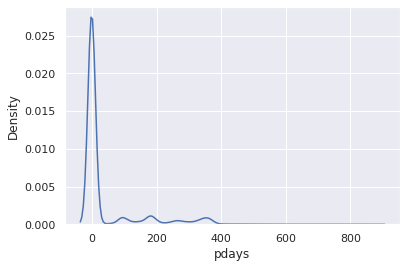

In [23]:
sns.kdeplot(data1['pdays'])

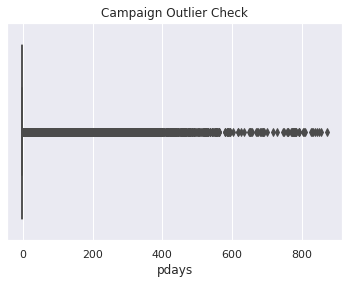

In [24]:
sns.boxplot(x=data1['pdays'])
plt.title('Campaign Outlier Check')
plt.show()

In [25]:
print("Maximum pdays:" ,data1['pdays'].max())
print("Minimum pdays:" ,data1['pdays'].min())
print("customer not contacted in perivious campaign:", len(data1[data1['pdays']== -1])/ len(data1))

Maximum pdays: 871
Minimum pdays: -1
customer not contacted in perivious campaign: 0.8173674548229414


- By analyzing the pdays data, we find that a large number of customers 81.7% not contacted previously by bank.

- We consider, number of days that passed by after the client was last contacted from a previous campaign has no outliers because pdays range does not affect our current campaign.

### Outlier for Previous

<AxesSubplot:xlabel='previous', ylabel='Density'>

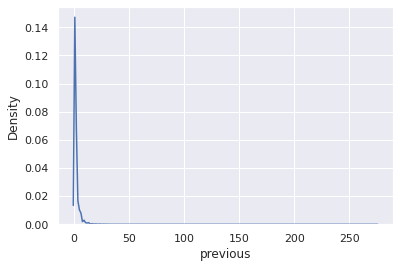

In [26]:
sns.kdeplot(data1['previous'])

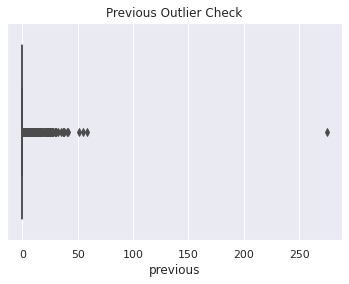

In [27]:
sns.boxplot(x=data1['previous'])
plt.title('Previous Outlier Check')
plt.show()

In [28]:
print("max:" ,data1['previous'].max())
print("previously not contected customer:", len(data1[data1['previous']==0])/len(data1))

max: 275
previously not contected customer: 0.8173674548229414


In [29]:
## customers previous contact more than 30  are replaced with  30
data1['previous'] = np.where(data1['previous']>30, 30, data1['previous'])

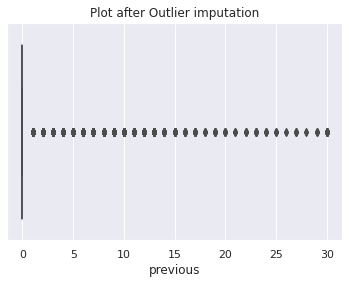

In [30]:
# After outliers imputation 
sns.boxplot(x=data1['previous'])
plt.title('Plot after Outlier imputation')
plt.show()

- By analyzing the previous data, we find that number of contacts performed before this campaign for particular customer should not be exceed 3. 

- Almost 75% customers were not previously contacted for loan.


### Descriptive Statistics

In [31]:
data2 = data1.copy()
data2.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.868185,1362.272058,15.806419,258.163080,2.392228,40.197828,0.571985
std,10.394895,3044.765829,8.322476,257.527812,1.600111,100.128746,1.853639
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,70.500000,102127.000000,31.000000,4918.000000,6.000000,871.000000,30.000000


### Below conclusion can be done based on data summary:
- Maximum age is 70.5 and minimum age is 18.
 
- Minimum account balance of customer is in negative; it means some accounts are loan account and maximum balance is 102127.

- Maximum number of contacts performed during this campaign for particular customer is 6 and minimum contact is 1.

- Maximum number of days that passed by after the client was last contacted from a previous campaign is 871 and minimum days is -1, it means some customers are not contacted previously.

- A large number of customers were not contacted in previous campaign and maximum time contact a customer should be 6.


## 3.5 Univariate Analysis 

Univariate, in which we analyze date of just one variable. A variable in our dataset refers to a single feature/column.

### Analysis of deposit record of customers

no     39922
yes     5289
Name: y, dtype: int64
Yes deposit percentage: 11.7 %


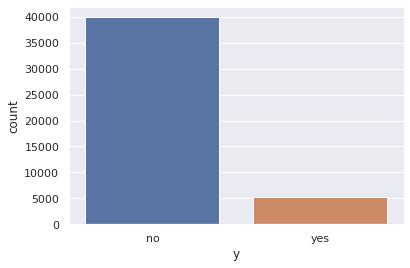

In [32]:
# count of deposit of customer
deposit_counts = data2['y'].value_counts()
print(deposit_counts)
print("Yes deposit percentage:", np.round((data2[data2['y']=='yes'].shape[0]/data2.shape[0])*100,2),"%")

# plot of customer deposit 
sns.countplot(data2.y)
plt.show()

- Customers deposit for "yes" is around 11.7%.


### Analysis last contact month of year

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


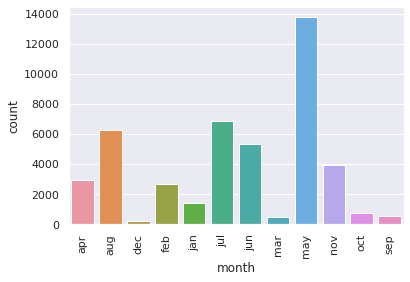

In [33]:
data3= data2.sort_values(['month'])
month_counts = data3['month'].value_counts()
print(month_counts)

# plot
sns.countplot(x='month', data= data3)
plt.xticks(rotation=90)
plt.show()

- By analyzing above figure, we can see that maximum customers were contacted in month of "may" and minimum contacted (in month of "dec". It means our previous campaign was most active during summer time.

### Communication Types

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


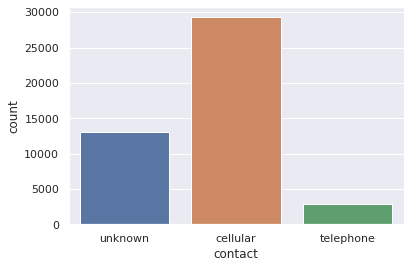

In [34]:
contact_counts = data2['contact'].value_counts()
print(contact_counts)

# plot
sns.countplot(x='contact', data= data2)
plt.show()

- 	Maximum customer prefers communication via cellular and minimum communication via telephone.

### Analysis of marital status of customers

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


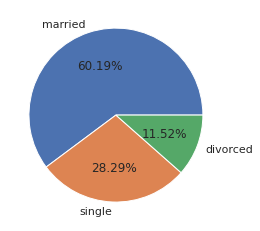

In [35]:
# count of marital status of customer
marital_counts = data2['marital'].value_counts()
print(marital_counts) 

plt.pie(data2['marital'].value_counts(), labels=data2['marital'].unique(), autopct='%1.2f%%')
plt.show()

- By analyzing the figure above, we can see that customer marital status has three categories (Single, Divorced, Married).

- Married customers are maximum (60.19%) and minimum customers are divorced (11.52%).

### Housing loan

yes    25130
no     20081
Name: housing, dtype: int64
yes precentage for house loan: 0.556


<AxesSubplot:xlabel='housing', ylabel='count'>

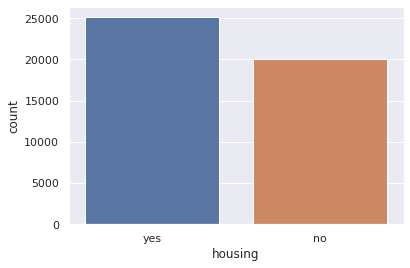

In [36]:
housing_loan_counts = data2['housing'].value_counts()
print(housing_loan_counts )
print("yes precentage for house loan:", np.round(data2[data2['housing']=='yes'].shape[0]/data2.shape[0],3))
sns.countplot(x='housing',data=data2)

- The positive deposit of customers for housing loan around 55.6%.

### Loan

no     37967
yes     7244
Name: loan, dtype: int64
yes precentage for loan: 0.16


<AxesSubplot:xlabel='loan', ylabel='count'>

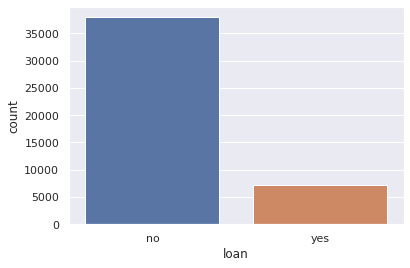

In [37]:
loan_counts = data2['loan'].value_counts()
print(loan_counts )
print("yes precentage for loan:", np.round(data2[data2['loan']=='yes'].shape[0]/data2.shape[0],3))
sns.countplot(x='loan',data=data2)

- Most of customers deposit "no" for personal loan and "yes" deposit percentage is 16%.

### Analysis of type of jobs of customers

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


<AxesSubplot:title={'center':'Job types of customers'}>

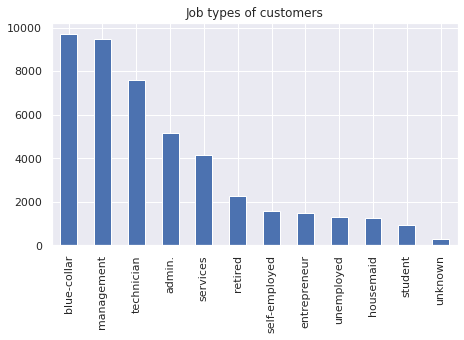

In [38]:
# count of job types of customer
job_counts = data2['job'].value_counts()
print(job_counts)
# Bar plot
plt.subplot(221)
data2['job'].value_counts().plot(kind='bar', title='Job types of customers',figsize=(16,9))

- Maximum customers have management jobs and some part of jobs types is unknown.


### Analysis of Poutcome

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


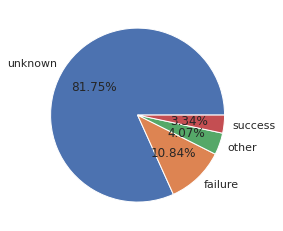

In [39]:
# count of previously targeted customer
poutcome_counts = data2['poutcome'].value_counts()
print(poutcome_counts) 

plt.pie(data2['poutcome'].value_counts(), labels=data2['poutcome'].unique(), autopct='%1.2f%%')
plt.show()

- By analyzing above graph, we find that outcome of the previous marketing campaign was not pretty good. As we can see that success rate is 3.34% which is very low.

- Almost 81.75% outcome is unknown and 10.84% campaign outcome is failure and 4.07% outcome goes for another category.

### Analysis of Default credit

no     44396
yes      815
Name: default, dtype: int64


<AxesSubplot:xlabel='default', ylabel='count'>

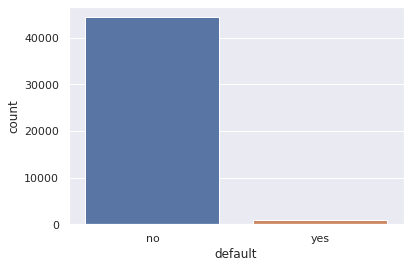

In [40]:
# count of job types of customer
job_counts = data2['default'].value_counts()
print(job_counts)
sns.countplot(x='default',data=data2)

- The count for default loan is less.


###  Analysis of customers education

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


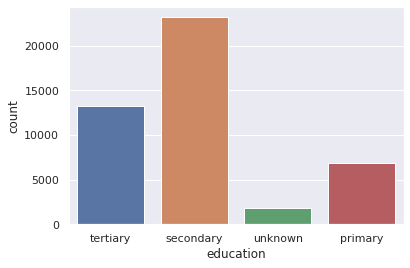

In [41]:
# count of education type of customers
education_counts = data2['education'].value_counts()
print(education_counts)
# plot of customer eduaction type
sns.countplot(data2.education)
plt.show()

- Maximum customers belong to secondary education category and some count of education type is unknown.

- Education type count decrease from secondary to primary.


### Distribution plots of numeric columns¶

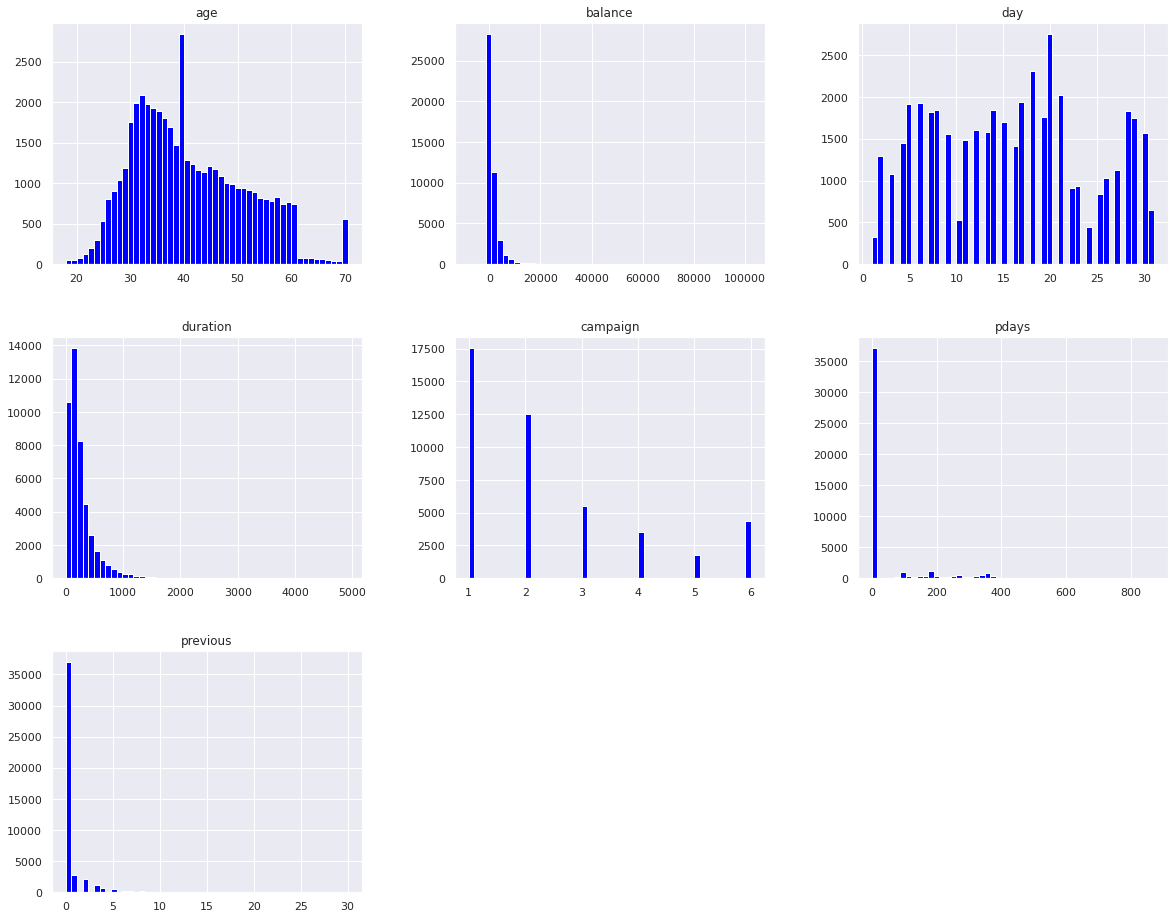

In [42]:
%matplotlib inline
data2.hist(bins = 50, figsize=(20,16), color = 'blue') 
plt.show()

## 3.6 Bivariate Analysis

### Comparision of job, education, marital and contact data with target variable "deposit"

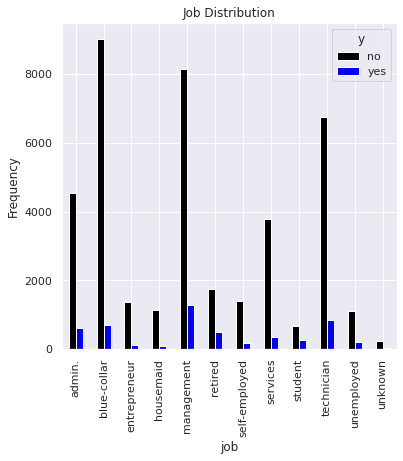

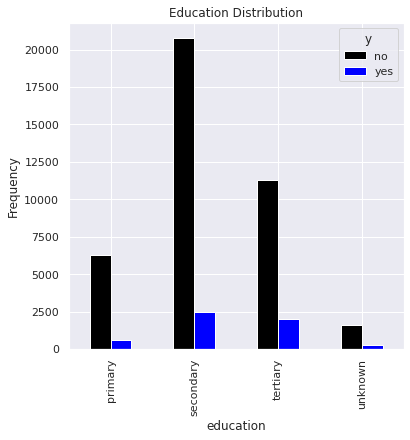

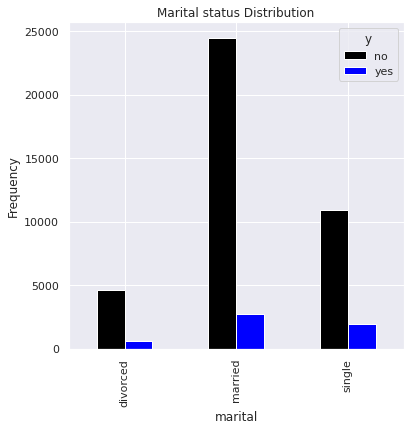

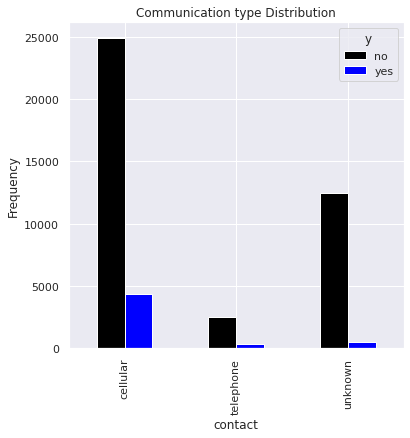

In [43]:
# job vs deposit 
pd.crosstab(data2.job,data2.y).plot(kind="bar",figsize=(6,6),color=['black','blue'])
plt.title('Job Distribution')
plt.ylabel('Frequency')
# education vs deposit
pd.crosstab(data2.education,data2.y).plot(kind="bar",figsize=(6,6),color=['black','blue'])
plt.title('Education Distribution')
plt.ylabel('Frequency')
# marital vs deposit
pd.crosstab(data2.marital,data2.y).plot(kind="bar",figsize=(6,6),color=['black','blue'])
plt.title('Marital status Distribution')
plt.ylabel('Frequency')
# contact vs deposit
pd.crosstab(data2.contact,data2.y).plot(kind="bar",figsize=(6,6),color=['black','blue'])
plt.title('Communication type Distribution')
plt.ylabel('Frequency')
plt.show()

### Comparision of housing loan, loan and default data with target variable "deposit"

Text(0, 0.5, 'Frequency')

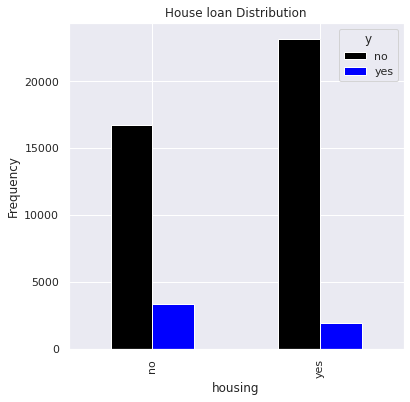

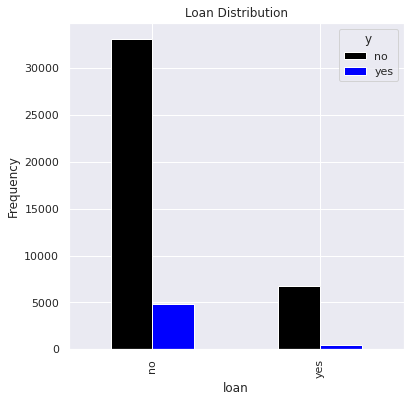

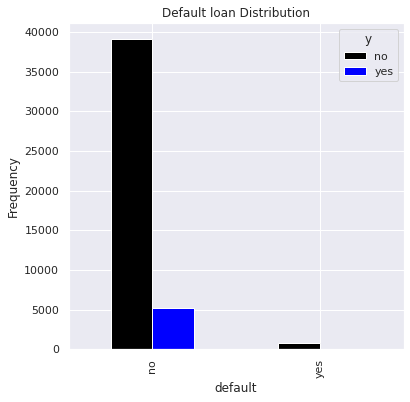

In [44]:
# housing vs deposit
pd.crosstab(data2.housing,data2.y).plot(kind="bar",figsize=(6,6),color=['black','blue'])
plt.title('House loan Distribution')
plt.ylabel('Frequency')
# loan vs deposit
pd.crosstab(data2.loan,data2.y).plot(kind="bar",figsize=(6,6),color=['black','blue'])
plt.title('Loan Distribution')
plt.ylabel('Frequency')
# default vs deposit
pd.crosstab(data2.default,data2.y).plot(kind="bar",figsize=(6,6),color=['black','blue'])
plt.title('Default loan Distribution')
plt.ylabel('Frequency')

### Comparision of campaign, poutcome and month data with target variable "deposit"

Text(0, 0.5, 'Frequency')

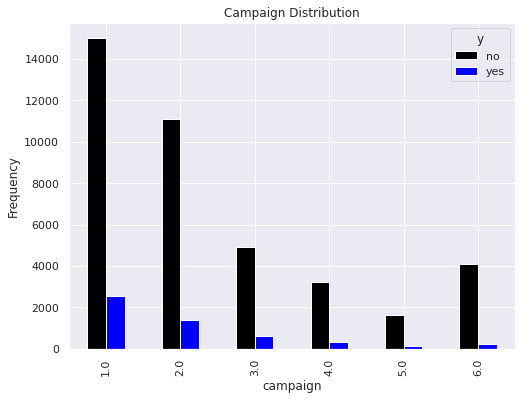

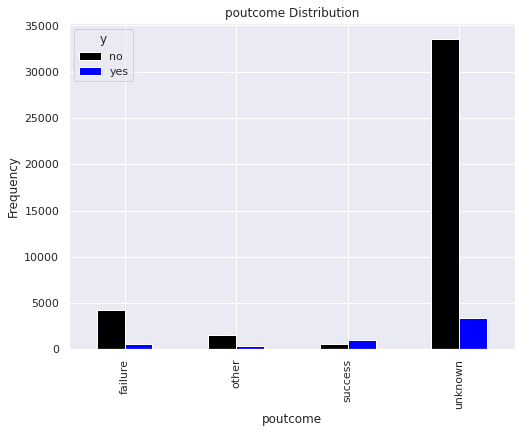

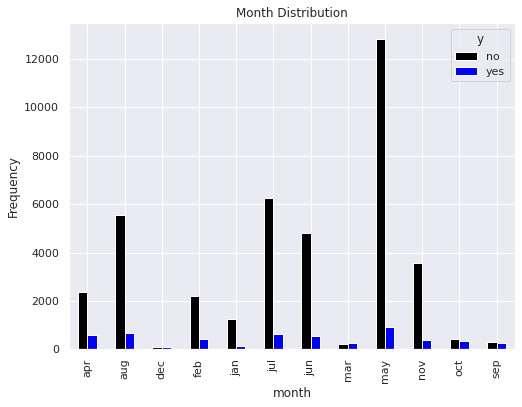

In [45]:
# campaign vs deposit
pd.crosstab(data2.campaign,data2.y).plot(kind="bar",figsize=(8,6),color=['black','blue'])
plt.title('Campaign Distribution')
plt.ylabel('Frequency')
# poutcome vs deposit
pd.crosstab(data2.poutcome,data2.y).plot(kind="bar",figsize=(8,6),color=['black','blue'])
plt.title('poutcome Distribution')
plt.ylabel('Frequency')
# month vs deposit
pd.crosstab(data2.month,data2.y).plot(kind="bar",figsize=(8,6),color=['black','blue'])
plt.title('Month Distribution')
plt.ylabel('Frequency')

In [46]:
a1 = data2[(data2['month']=='may')]['y'].value_counts()
print("Yes deposit percentage for may month: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))

a1 = data2[(data2['month']=='mar')]['y'].value_counts()
print("Yes deposit percentage for march month: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))

a1 = data2[(data2['month']=='oct')]['y'].value_counts()
print("Yes deposit percentage for october month: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))

a1 = data2[(data2['month']=='sep')]['y'].value_counts()
print("Yes deposit percentage for september month: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))

a1 = data2[(data2['month']=='aug')]['y'].value_counts()
print("Yes deposit percentage for august month: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))



Yes deposit percentage for may month:  6.7195
Yes deposit percentage for march month:  51.9916
Yes deposit percentage for october month:  43.7669
Yes deposit percentage for september month:  46.4594
Yes deposit percentage for august month:  11.0133


### Comparision of call duration with target variable "deposit"

In [47]:
# Create bins for duration
data2['duration_bins_sec'] = pd.cut(x=data2['duration'], bins=[0,60,180,300,600,1200,4918])
data2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,duration_bins_sec
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1.0,-1,0,unknown,no,"(180, 300]"
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1.0,-1,0,unknown,no,"(60, 180]"
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1.0,-1,0,unknown,no,"(60, 180]"
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1.0,-1,0,unknown,no,"(60, 180]"
4,33.0,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1.0,-1,0,unknown,no,"(180, 300]"


In [48]:
a1 = data2[(data2['duration']>0)&(data2['duration']<60)]['y'].value_counts()
print("Yes deposit percentage for 0-60 sec duration: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))
a1 = data2[(data2['duration']>60)&(data2['duration']<180)]['y'].value_counts()
print("Yes deposit percentage for 60-180 sec duration: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))
a1 = data2[(data2['duration']>180)&(data2['duration']<300)]['y'].value_counts()
print("Yes deposit percentage for 180-300 sec duration: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))
a1 = data2[(data2['duration']>300)&(data2['duration']<600)]['y'].value_counts()
print("Yes deposit percentage for 300-600 sec duration: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))
a1 = data2[(data2['duration']>600)&(data2['duration']<1200)]['y'].value_counts()
print("Yes deposit percentage for 600-1200 sec duration: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))
a1 = data2[(data2['duration']>1200)]['y'].value_counts()
print("Yes deposit percentage for 1200 sec duration: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))

Yes deposit percentage for 0-60 sec duration:  0.1933
Yes deposit percentage for 60-180 sec duration:  3.894
Yes deposit percentage for 180-300 sec duration:  10.8883
Yes deposit percentage for 300-600 sec duration:  19.1336
Yes deposit percentage for 600-1200 sec duration:  46.049
Yes deposit percentage for 1200 sec duration:  61.7857


Text(0, 0.5, 'Frequency')

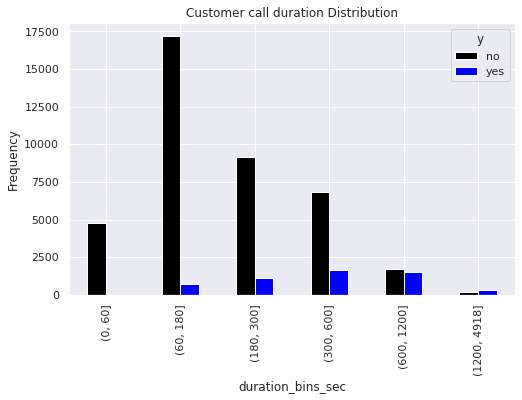

In [49]:
pd.crosstab(data2.duration_bins_sec,data2.y).plot(kind="bar",figsize=(8,5),color=['black','blue'])
plt.title('Customer call duration Distribution')
plt.ylabel('Frequency')

### Comparision age of customers with target variable "deposit"

In [50]:
# Create bins for age column
data2['age_bins']=pd.cut(x=data2['age'], bins=[18,30,40,50,70.5])
data2['age_by_decad'] = pd.cut(x=data2['age'], bins=[18,30,40,50,70.5], labels=['30s', '40s', '50s','70s'])
data2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,duration_bins_sec,age_bins,age_by_decad
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1.0,-1,0,unknown,no,"(180, 300]","(50.0, 70.5]",70s
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1.0,-1,0,unknown,no,"(60, 180]","(40.0, 50.0]",50s
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1.0,-1,0,unknown,no,"(60, 180]","(30.0, 40.0]",40s
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1.0,-1,0,unknown,no,"(60, 180]","(40.0, 50.0]",50s
4,33.0,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1.0,-1,0,unknown,no,"(180, 300]","(30.0, 40.0]",40s


Text(0, 0.5, 'Frequency')

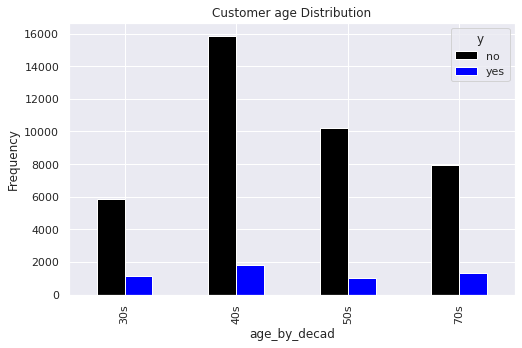

In [51]:
pd.crosstab(data2.age_by_decad,data2.y).plot(kind="bar",figsize=(8,5),color=['black','blue'])
plt.title('Customer age Distribution')
plt.ylabel('Frequency')

In [52]:
a1 = data2[(data2['age']>18)&(data2['age']<30)]['y'].value_counts()
print("Yes deposit percentage for 18-30 age: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))
a1 = data2[(data2['age']>30)&(data2['age']<40)]['y'].value_counts()
print("Yes deposit percentage for 30-40 age: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))
a1 = data2[(data2['age']>40)&(data2['age']<50)]['y'].value_counts()
print("Yes deposit percentage for 40-50 age: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))
a1 = data2[(data2['age']>50)&(data2['age']<70.5)]['y'].value_counts()
print("Yes deposit percentage for 50-70.5 age: ", np.round((a1['yes']/(a1['yes']+a1['no']))*100,4))

Yes deposit percentage for 18-30 age:  17.5062
Yes deposit percentage for 30-40 age:  10.3845
Yes deposit percentage for 40-50 age:  9.1942
Yes deposit percentage for 50-70.5 age:  12.4886


## 3.7 Correlation Matrix

- A heat map is a two-dimensional representation of data in which values are represented by colors which provides a visual summary of information.


- Heat map work with only numerical values.

<AxesSubplot:>

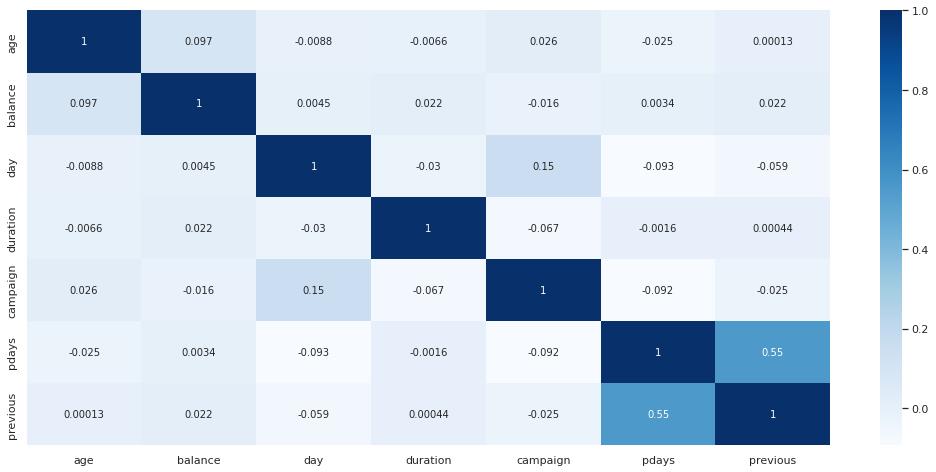

In [53]:
plt.figure(figsize=[18,8])
sns.heatmap(data2.corr(),annot=True,cmap="Blues")

# 4. Conclusion 

The analysis are the recommendations for future marketing campaigns:
    
- Future campaigns should be targeted on customers from age categories below 30 years old and above 50 years old. Student and Senior citizen are more responded.


- The number of contacts with the customer shouldn't exceed 3.


- Mode of contact should be cellular and telephone.


- The month of highest level of marketing activity was the month of May. But high deposit rate of customers is in (March, September and October). Campaign highly active in summer time. So, for future campaign marketing activity should be increase in winter season.


- Call duration highly effect the deposit rate. Deposit rate and call duration is directly proportional. So, when increase call duration deposit rate also increase.


- Married people have more positive responses for deposit.


- House loan demanding is more in customer’s than personal loan. People who preferred housing loan and not default are best to target.


- People who have management, technician and blue-collar related jobs are best to target.


- People who have completed their secondary education respond more for deposit. Students come under this category most.

